# The Dataset used can be found on https://archive.ics.uci.edu/ml/datasets/iris

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from scipy.stats import zscore
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("iris.csv",header=None,names=['sepal length in cm','sepal width in cm','petal length in cm','petal width in cm','class'])

In [3]:
df.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df['class'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: class, dtype: int64

### The Data is classified into 3 classes

C:\Users\bilal\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


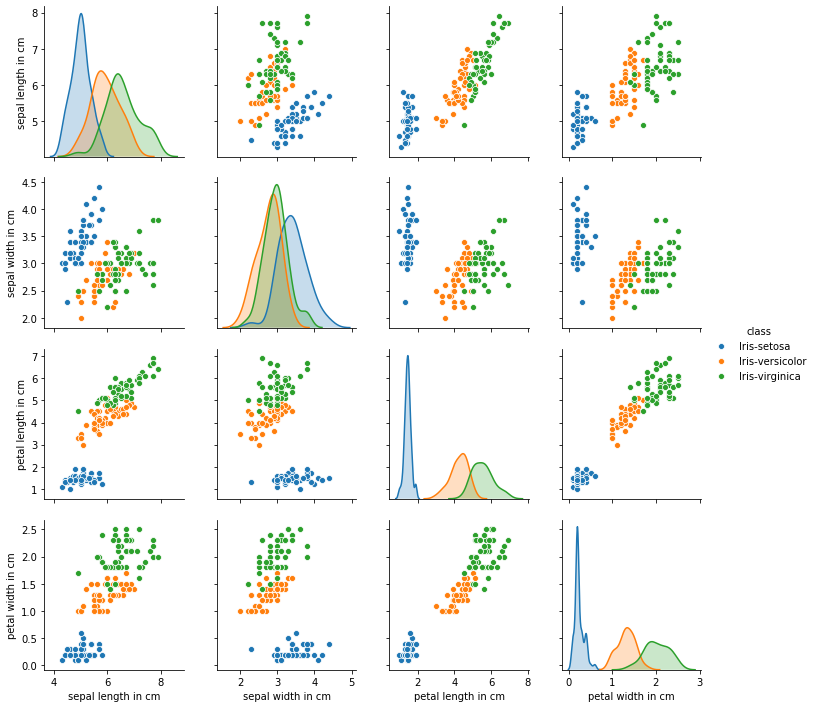

In [5]:
import seaborn as sns
sns.pairplot(df,diag_kind='kde',hue = 'class')
plt.show()

## For clustering of the data, removing the target variable i.e., class

In [6]:
df2 = df.iloc[:, :4]

In [7]:
df2.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


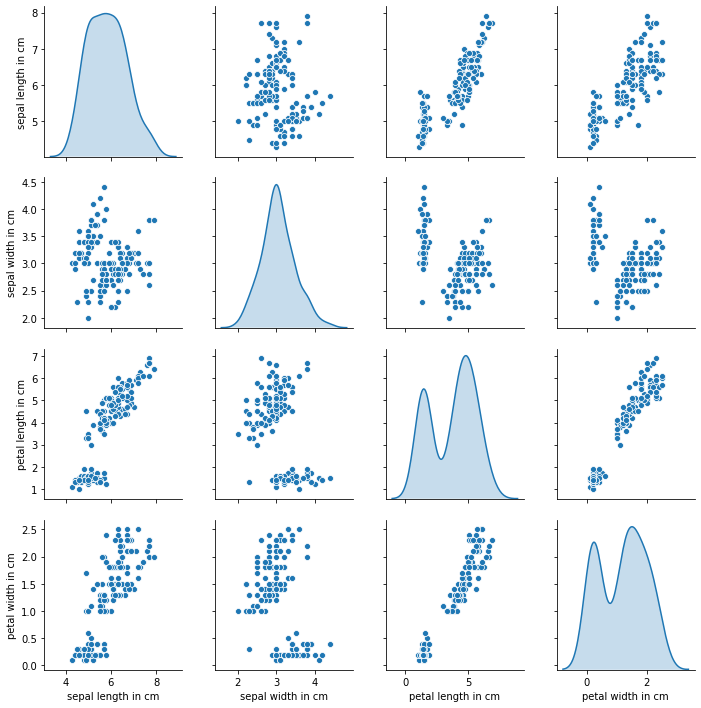

In [8]:
import seaborn as sns
sns.pairplot(df2,diag_kind='kde')

### By the pair plot, we can tell that there are two clusters that are very seperate


## K-Means Clustering

In [9]:
df_scaled = df2.apply(zscore)


In [10]:
df_scaled.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [11]:
cluster_range = range( 1, 15 )
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters,n_init = 15, random_state=2)
  clusters.fit(df_scaled)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,600.000000
1,2,223.732006
2,3,140.965817
3,4,114.615507
4,5,91.111019
5,6,80.166277
6,7,71.986145
7,8,62.641008
8,9,54.343737
9,10,47.572395


### Elbow Plot

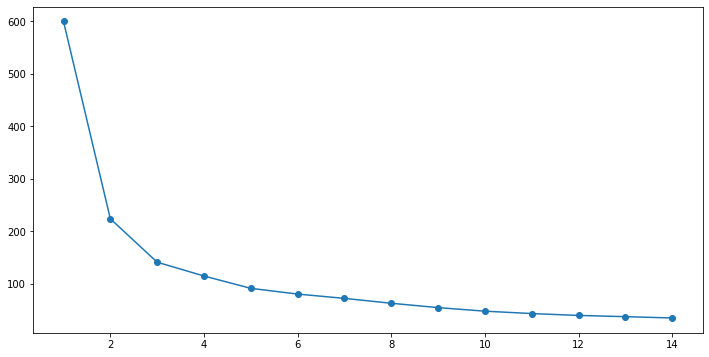

In [12]:

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

### The Value of K at which we see a significant drop in error is 2 then at 3

### Let us first consider k=2 first 

In [13]:
kmeans = KMeans(n_clusters=2, n_init = 15, random_state=2)

In [14]:
kmeans.fit(df_scaled)

KMeans(n_clusters=2, n_init=15, random_state=2)

In [15]:
centroids=kmeans.cluster_centers_

In [16]:
centroid_df = pd.DataFrame(centroids, columns = list(df_scaled) )

In [17]:
centroid_df

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
0,0.507289,-0.421153,0.652439,0.627564
1,-1.014579,0.842307,-1.304878,-1.255129


kmeans.labels_
pd.DataFrame(kmeans.labels_, columns = "label")

In [18]:
## creating a new dataframe only for labels and converting it into categorical variable
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))

df_labels['labels'] = df_labels['labels'].astype('category')

In [19]:
# Joining the label dataframe with the Wine data frame to create wine_df_labeled. Note: it could be appended to original dataframe
iris_df_labeled = df_scaled.join(df_labels)

### Finding Inertia

In [20]:
iris_clusters = iris_df_labeled.groupby(['labels'])
#wine_clusters = wine_data_attr.groupby(['clusters'])
df0=iris_clusters.get_group(0)
df1=iris_clusters.get_group(1)


In [21]:
c0=kmeans.cluster_centers_[0,:]
c1=kmeans.cluster_centers_[1,:]


In [22]:
I0=0
I1=0
for i in np.arange(df0.shape[0]):
  I0=I0+np.sum((df0.iloc[i,:-1]-c0)**2)
for i in np.arange(df1.shape[0]):
  I1=I1+np.sum((df1.iloc[i,:-1]-c1)**2)

  

In [23]:
tot_I=I0+I1
print(tot_I)

223.73200573676348


In [24]:
kmeans.inertia_

223.73200573676343

In [25]:
finaldf = pd.concat([df0,df1])
finaldf.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,labels
50,1.401508,0.337848,0.535296,0.264699,0
51,0.674501,0.337848,0.421564,0.396172,0
52,1.280340,0.106445,0.649027,0.396172,0
53,-0.416010,-1.744778,0.137236,0.133226,0
54,0.795669,-0.587764,0.478430,0.396172,0


### Visualizing the clusters

C:\Users\bilal\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\bilal\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


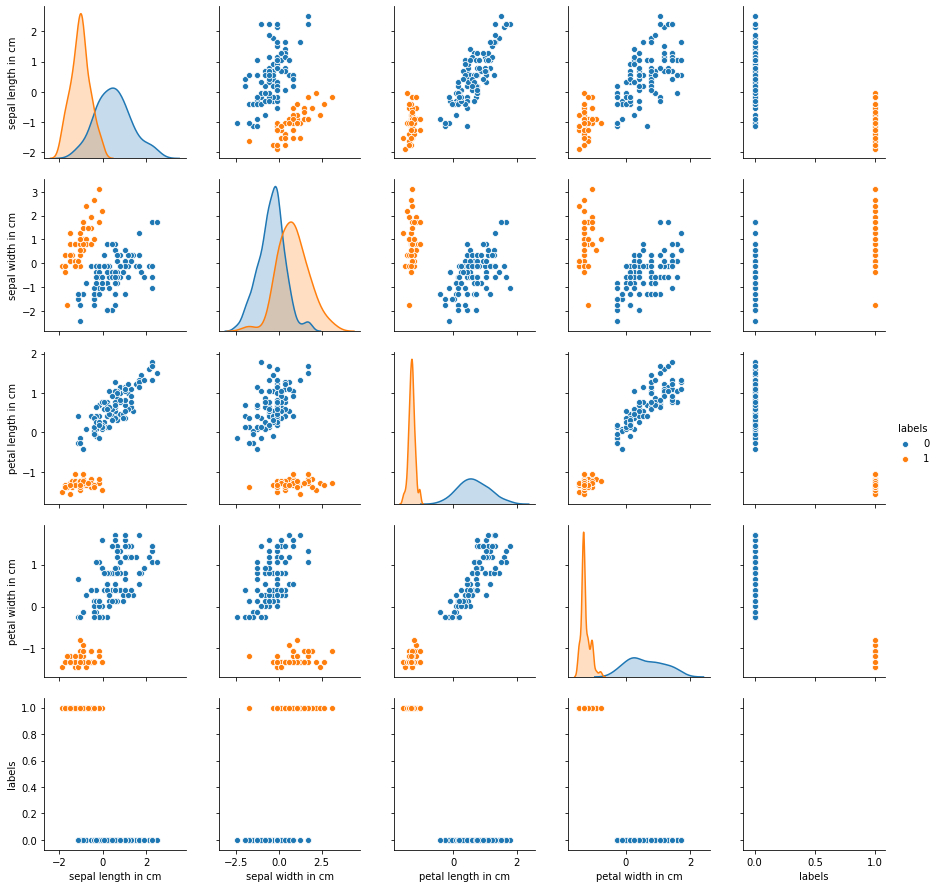

In [26]:
sns.pairplot(finaldf,diag_kind='kde',hue = 'labels')
plt.show()

### Using a Boxplot, We can check the significance of the variables

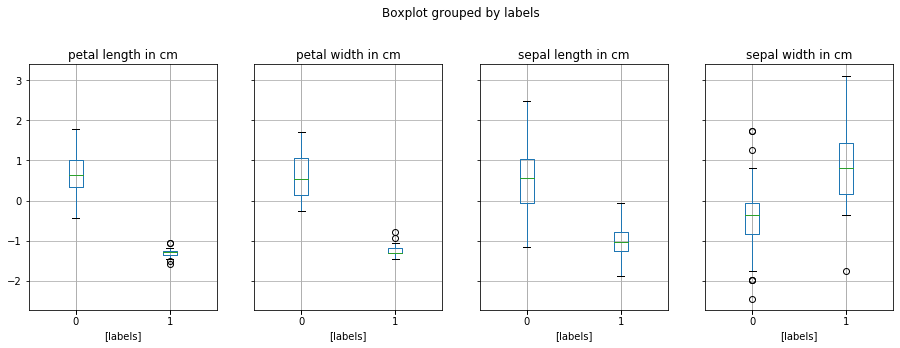

In [27]:
finaldf.boxplot(by='labels',layout=(2,4),figsize=(15,10))
plt.show()

### In the boxplot, we can see that all the variables are significant

## SILHOUETTE SCORE

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.580184463257396


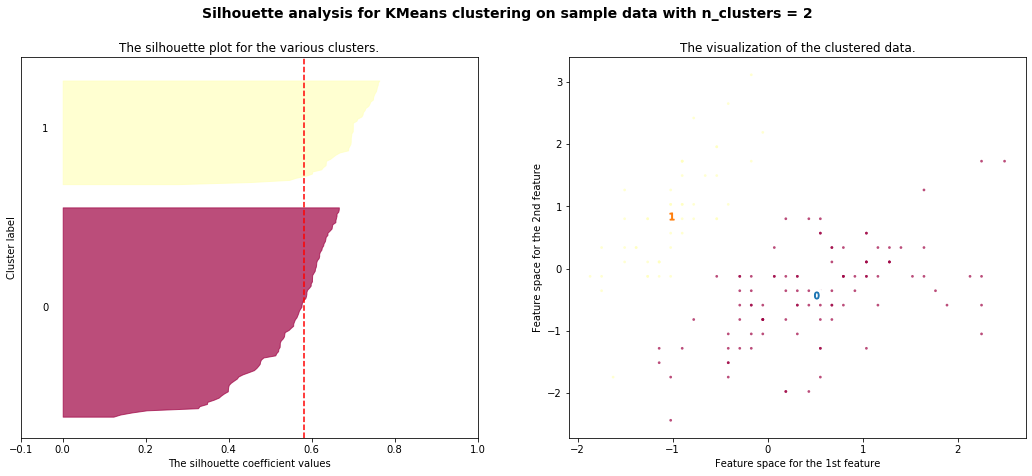

For n_clusters = 3 The average silhouette_score is : 0.4589717867018717


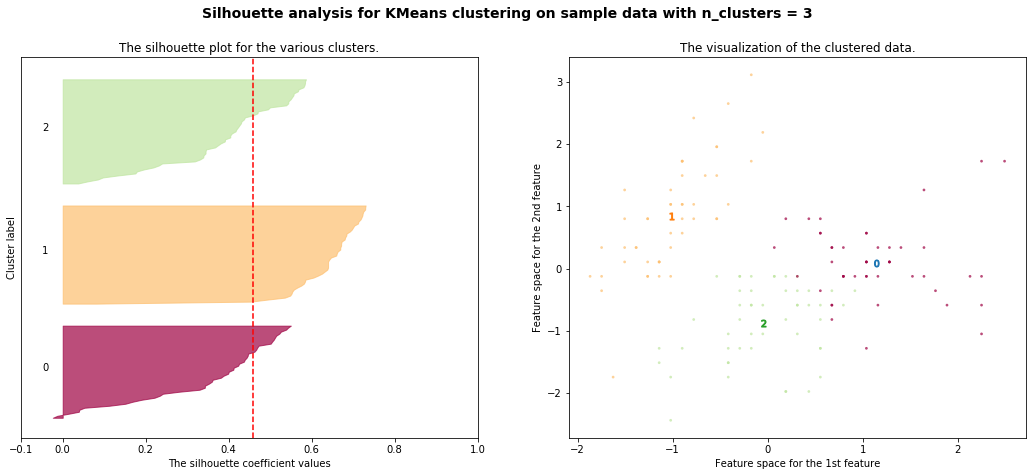

For n_clusters = 4 The average silhouette_score is : 0.38724679456128813


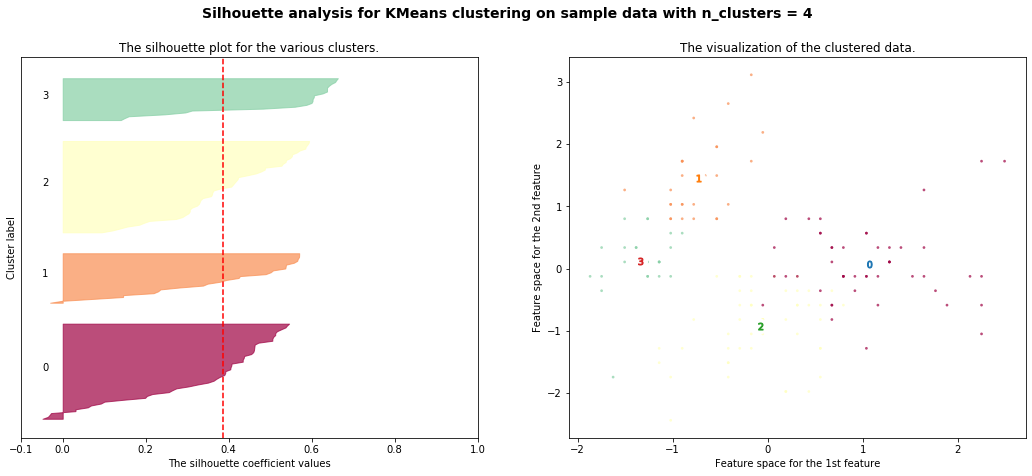

For n_clusters = 5 The average silhouette_score is : 0.3486998366107098


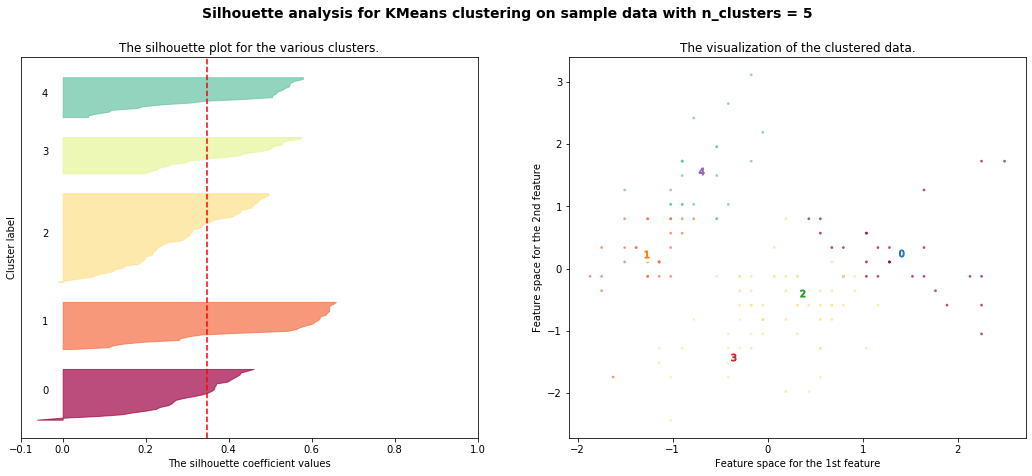

For n_clusters = 6 The average silhouette_score is : 0.3357068375986225


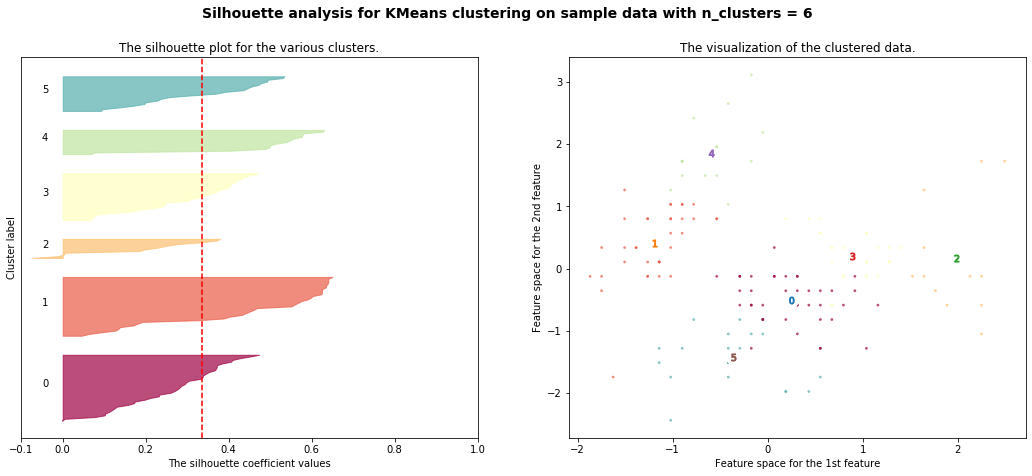

In [28]:
## from __future__ import print_function
%matplotlib inline


from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X=df_scaled.values

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

### We have the highest Silhouette score for n_clusters = 2 
### So by the silhouette score, we can say that we have 2 seperate clusters

## Using Agglomerative clustering Dendogram
### It helps to visualize the cluster from a granular level

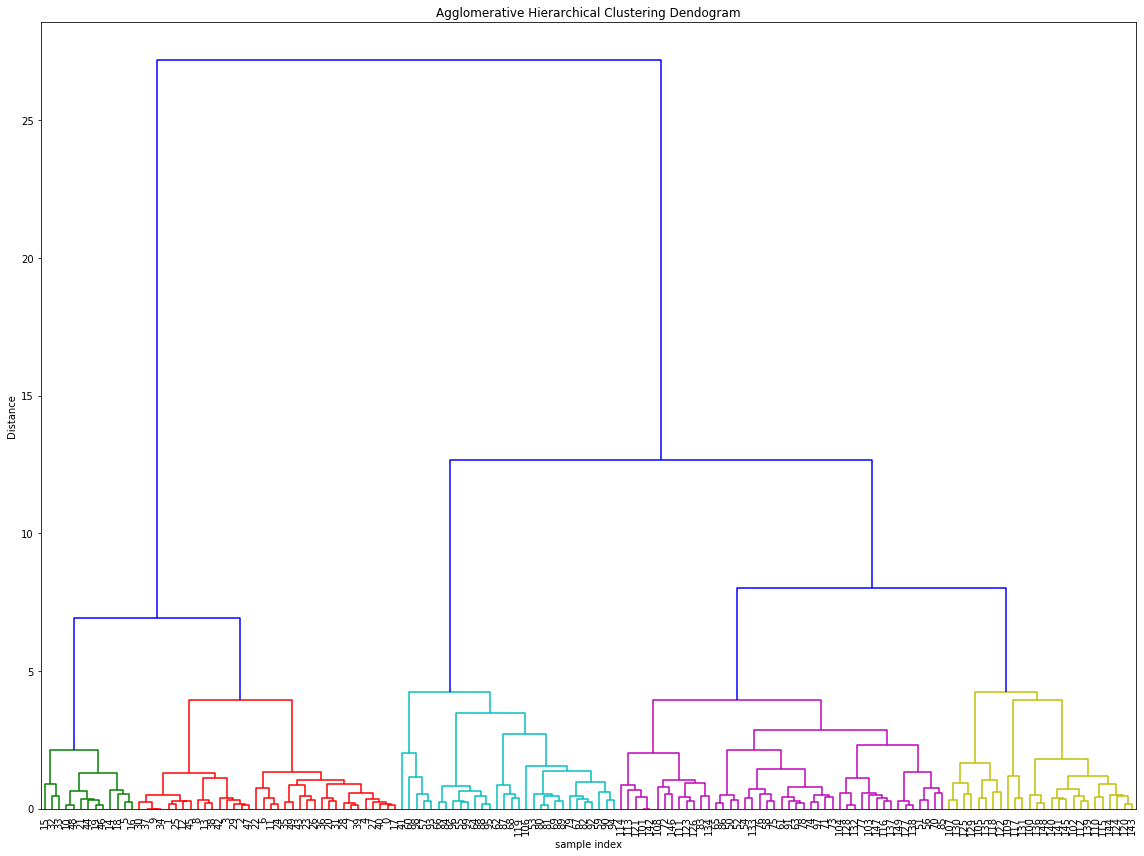

In [29]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
plt.figure(figsize=(16, 12))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(df_scaled, 'ward')
dendrogram(Z,leaf_rotation=90.0,p=25,color_threshold=5 ,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()

## Dendogram also shows that first we have 2 seperate clusters then 3 

# If we compare the labelled data and the clustered data, We can say that the classes versicolor and virginica form one cluster and sertosa forms another cluster